# Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contains details about customers, including both numerical and categorical data. The target variable is "Churn," which has two categories, making this a classification problem. Our objective is to predict customer churn using various classification models.

## Exploratory Data Analysis (EDA)

In [10]:
#Checking the dimension od dataset
df.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns. Out of which 1 is target variable and remaining 20 are independent variables.

In [13]:
# Checking the columns of dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [15]:
# Checking the types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are three different types of data (int64,float and object) present in the dataset.



In [18]:
#Checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see there are no null values present in this dataset.

<Axes: >

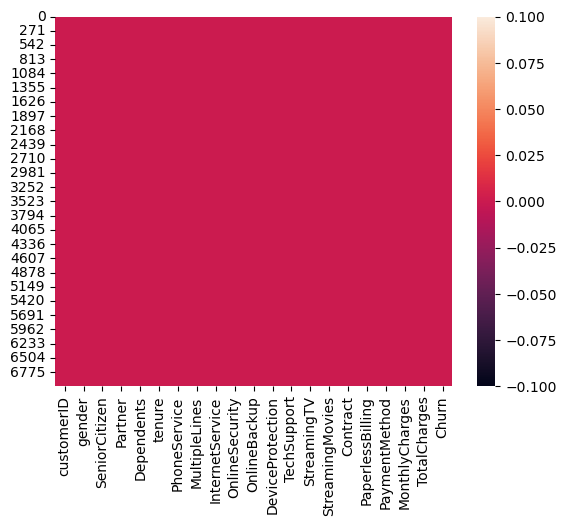

In [21]:
#Visualizing null values using heatmap
sns.heatmap(df.isnull())

No missing data present.

In [24]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This gives the brief about the dataset which includes indexing type,column type,no null values and memory usage.

In [27]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

The value counts of all columns are displayed, revealing that there are blanks in the TotalCharges column. It is important to check the unique values of this column.

In [30]:
# Checking the unique values of TotalCharges column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

It is observed that the TotalCharges column contains continuous data but is represented as an object data type. Additionally, there are 11 records with blank values in this column. 

In [33]:
# Checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Upon examining the TotalCharges column, it was found that it contains spaces as values, yet it shows zero missing values. This discrepancy will be addressed by filling the column with appropriate values.

In [36]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [38]:
# Converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

Converted the datatype of "TotalCharges" from object to float.

In [41]:
# Lets check null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After filling the blank spaces in the TotalCharges column with NaN values, it now displays 11 null values. The next step is to replace these NaN values using the mean method, as the data in this column is continuous.

In [44]:
# Checking the mean of TotalCharges column
print("The mean value of TotalCharges is:", df["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418656


In [46]:
# Filling null values in TotalCharges with its mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

<Axes: >

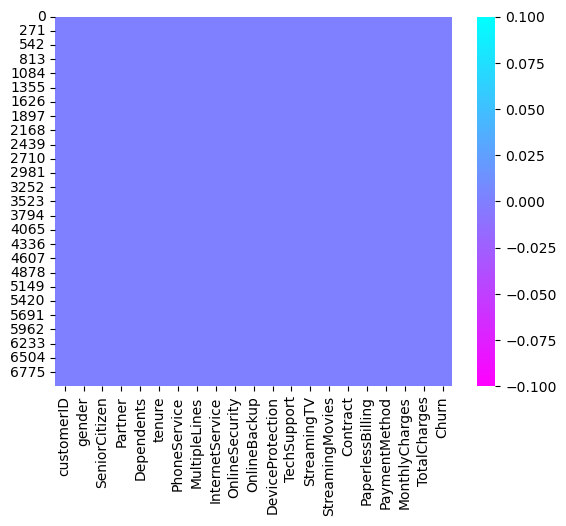

In [48]:
# Lets check the null values again
sns.heatmap(df.isnull(), cmap = "cool_r")

There are no missing missing values now.

In [51]:
#Separating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [53]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the dataset. Here CustomerID column has the data of unique ID to the customers which can be dropped.

In [56]:
# Dropping CustomerID column
df.drop("customerID", axis = 1, inplace = True)

In [58]:
# Checking the list of counts of target
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

These are two categories present in the target column namely "Yes" and "No"

In [61]:
# Checking the unique values in target column
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

### Description of Dataset

In [65]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The statistical summary offers valuable insights into the numerical columns, confirming that the dataset is well-structured, with no negative or invalid values.

Key observations from the analysis include:

- All columns have the same counts, indicating no missing values.
- In the `tenure` and `TotalCharges` columns, the mean exceeds the median (50%), showing right-skewness in the data.
- The `MonthlyCharges` column displays a mean lower than the median, suggesting left-skewness.
- A large gap between the 75th percentile and the maximum values points to potential outliers.
- The summary also highlights the standard deviation, minimum, and 25th percentile values, providing a thorough understanding of the dataset.

#### Univariate Analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

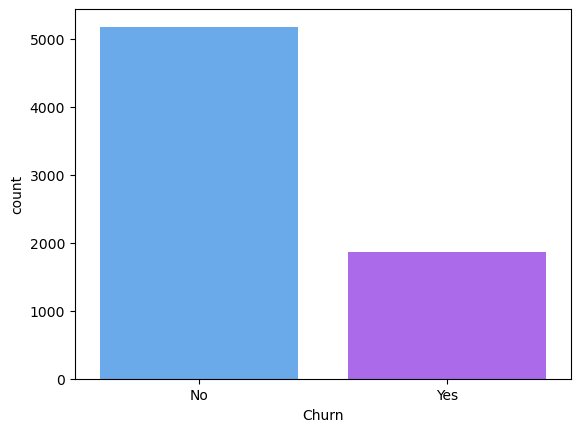

In [69]:
# Visualize the number of Churned customers
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df, palette = "cool")

It is observed that the count of "No Churn" customers is significantly higher than that of "Yes Churn" customers, indicating a class imbalance in the dataset.

gender
Male      3555
Female    3488
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

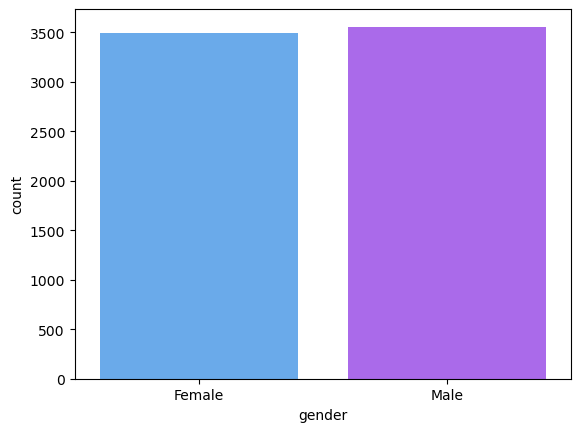

In [72]:
#Visualizing the count of Gender
print(df['gender'].value_counts())
sns.countplot(x='gender',data=df, palette = 'cool')

From the plot we can observe that the total number of male and female are almost same.

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


<Axes: xlabel='SeniorCitizen', ylabel='count'>

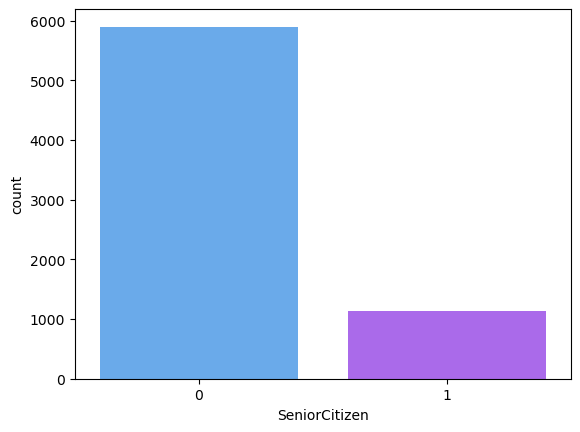

In [75]:
# Visualizing the count of Senior Citizens
print(df['SeniorCitizen'].value_counts())

# Creating a count plot for the SeniorCitizen column
sns.countplot(x='SeniorCitizen', data=df, palette='cool')

Here 0 represents non senior citizens and 1 represents senior citizens. The count of 0 is high compared to 1 which means the number of non senior citizen is quite high as compared to senior citizens data in the dataset.

Partner
No     3641
Yes    3402
Name: count, dtype: int64


<Axes: xlabel='Partner', ylabel='count'>

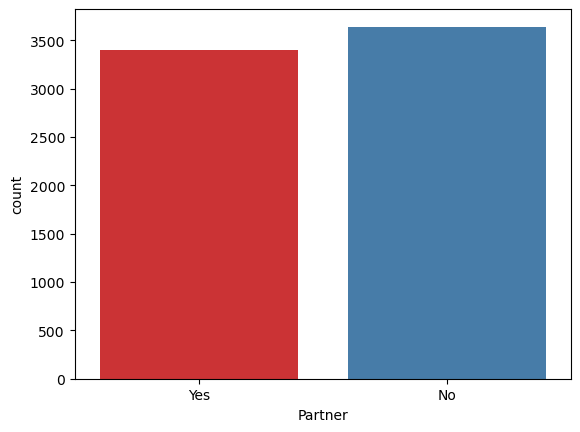

In [78]:
#Visualizing the count of Partner
print(df['Partner'].value_counts())
sns.countplot(x='Partner', data=df, palette = 'Set1')

The count of non-partnered customers is slightly higher compared to those who have partners.

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

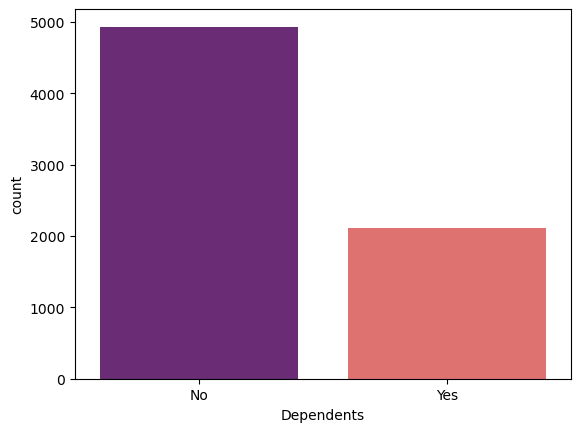

In [81]:
#Visualizing the count of Dependents
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df, palette = 'magma')

The number of customers with dependents is lower compared to those without dependents.

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


<Axes: xlabel='PhoneService', ylabel='count'>

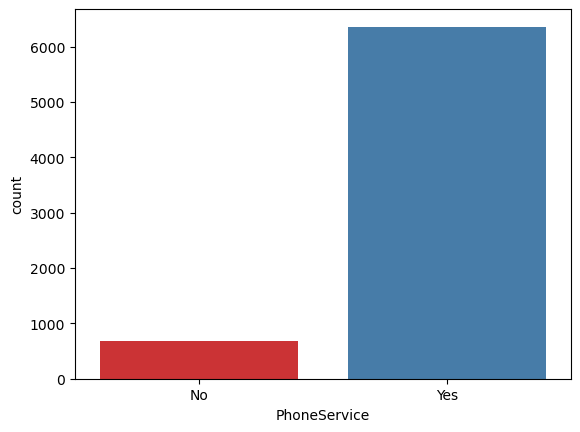

In [84]:
#Visualizing the count of PhoneService
print(df['PhoneService'].value_counts())
sns.countplot(x='PhoneService',data=df, palette = 'Set1')

The number of customers with phone services is significantly higher compared to those without phone services.

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


<Axes: xlabel='MultipleLines', ylabel='count'>

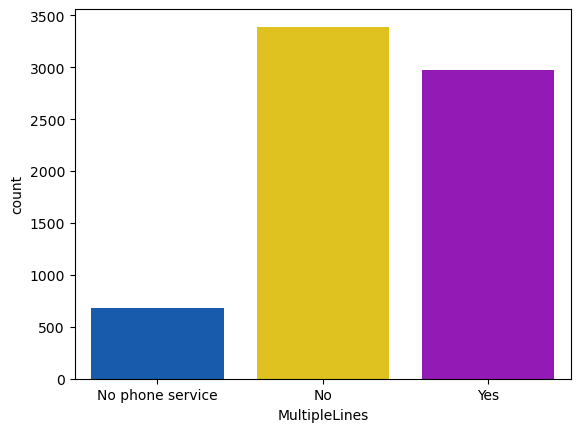

In [87]:
#Visualizing the count of MultipleLines
print(df['MultipleLines'].value_counts())
sns.countplot(x='MultipleLines', data=df,palette = 'prism')

The count of customers with single-line phone services is higher compared to those with multiple-line services. Additionally, the number of customers without phone services is very low in comparison to the others.

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


<Axes: xlabel='OnlineSecurity', ylabel='count'>

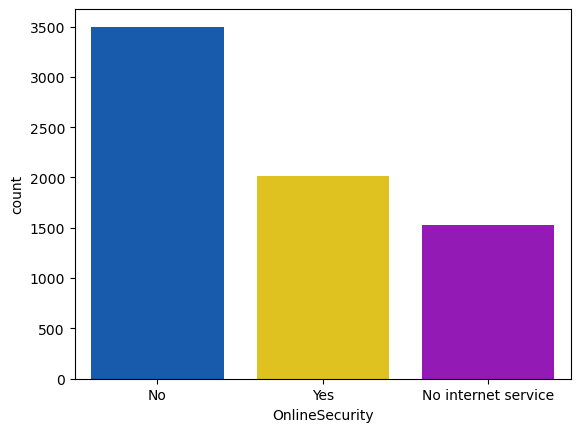

In [90]:
#Visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
sns.countplot(x='OnlineSecurity', data=df, palette = 'prism')

Customers without internet services do not require online security, while those with no internet services do need it. However, from the plot, it can be observed that the majority of customers with internet services have low online security.

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


<Axes: xlabel='OnlineBackup', ylabel='count'>

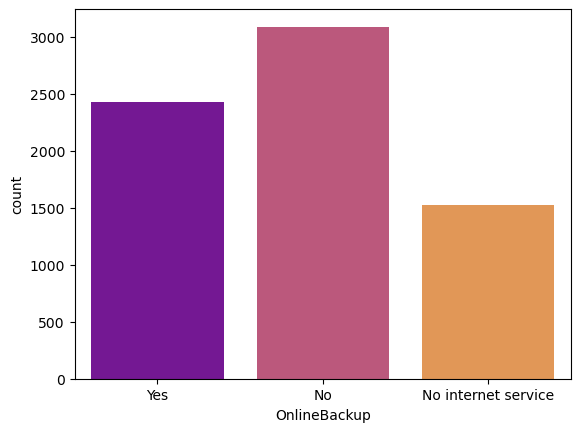

In [93]:
#Visualizing how many customers of OnlineBackup
print(df['OnlineBackup'].value_counts())
sns.countplot(x='OnlineBackup',data=df, palette = 'plasma')

It can be observed that customers without internet services have significantly lower counts for online backup compared to those with internet services.

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


<Axes: xlabel='DeviceProtection', ylabel='count'>

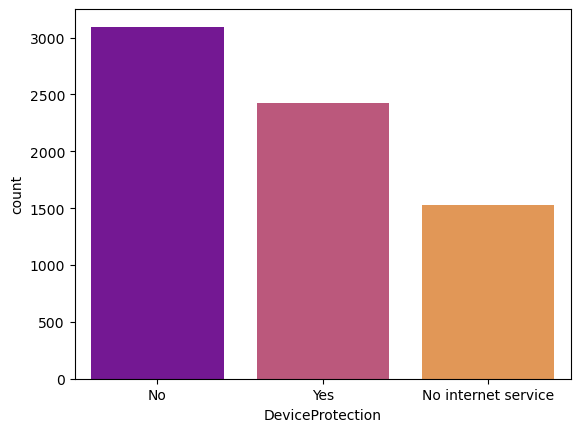

In [96]:
# Visualizing how many customers have DeviceProtection
print(df['DeviceProtection'].value_counts())
sns.countplot(x='DeviceProtection', data=df, palette = 'plasma')

We can see that the customers who do not have internet access, they don't need a lot of device protection.

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


<Axes: xlabel='TechSupport', ylabel='count'>

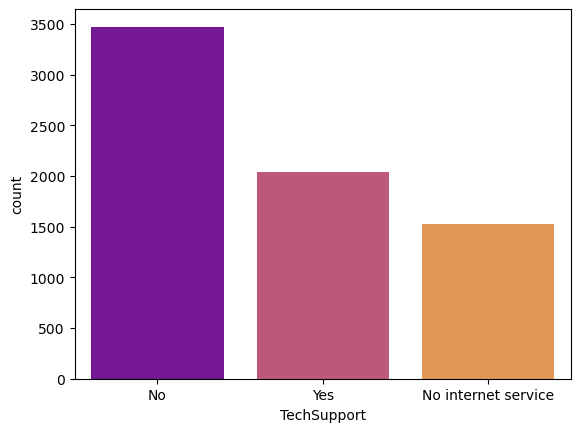

In [99]:
# Visualizing how many customers of TechSupport
print(df['TechSupport'].value_counts())
sns.countplot(x='TechSupport', data=df, palette = 'plasma')

The customers who do not need any technical support are higher in count as compared to the customers who need technical support.

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='StreamingTV'>

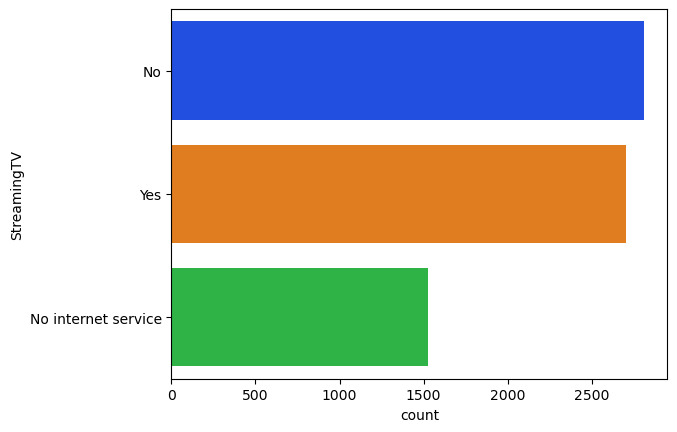

In [102]:
#Visualizing how many customers have StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"], palette = "bright")

The number of customers who do not use streaming TV is slightly higher than those who do. Additionally, customers without internet services generally do not have access to streaming TV.

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='StreamingMovies'>

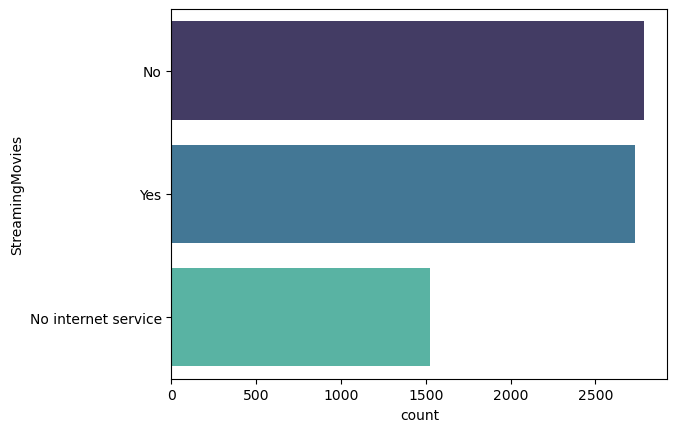

In [105]:
#Visualizing the count of customers with StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"], palette = "mako")

The number of customers without streaming movie services is higher compared to those with the service. Additionally, customers without internet services have significantly fewer streaming movie services than those with internet access.

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PaperlessBilling'>

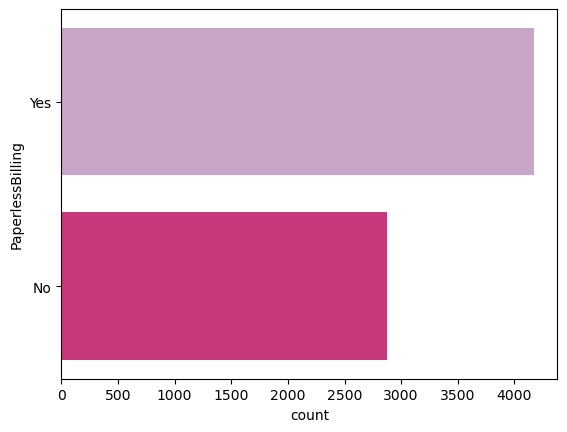

In [108]:
#Visualizing how many customers have PaymentMethod
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"], palette = "PuRd")

Most customers prefer paper billing, and the average number of customers who do not opt for paperless billing likely prefer receiving traditional paper bills.

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

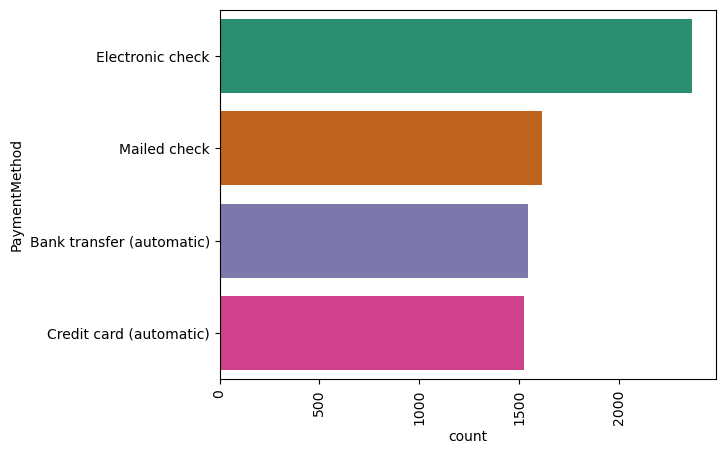

In [111]:
#Visualizing the count of PaymentMethod
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"], palette = "Dark2")
plt.xticks(rotation = 90)

Most customers prefer the Electronic Check payment method, while those who opt for Mailed Check, Bank Transfer, and Credit Card payments are moderate in count.

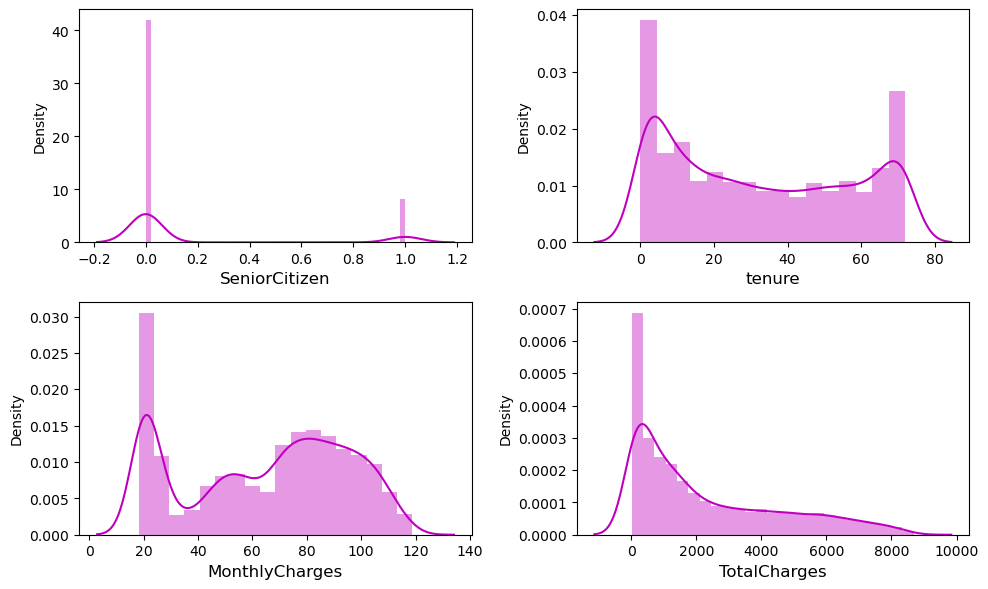

In [114]:
# Checking the data distribution in remaining columns
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

From the distribution plots, it can be observed that the data appears nearly normal across all columns except SeniorCitizen. The TotalCharges column shows right skewness, while the tenure and MonthlyCharges columns do not exhibit any skewness.

#### Bivariate Analysis


<Axes: title={'center': 'Comparison between tenure and SeniorCitizen'}, xlabel='SeniorCitizen', ylabel='tenure'>

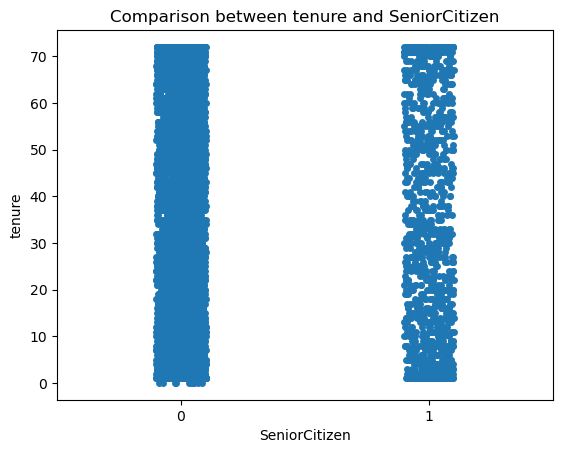

In [118]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen", y = "tenure", data = df)

There is no significant difference between the features, here both the features are in equal length.

<Axes: title={'center': 'Comparison between tenure and TotalCharges'}, xlabel='tenure', ylabel='TotalCharges'>

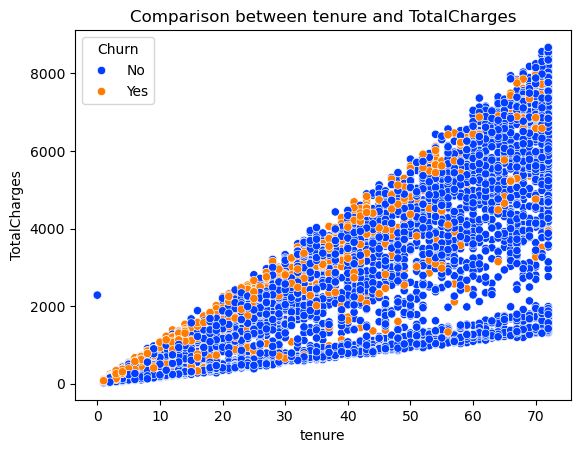

In [121]:
# Comparing tenure and TotalCharges
plt.title("Comparison between tenure and TotalCharges")
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, hue = 'Churn', palette = 'bright')

A strong linear relationship between the features can be observed. As tenure increases, TotalCharges also rises rapidly. Customers with shorter tenures are more likely to churn.

<Axes: title={'center': 'comparison between TotalCharges and MonthlyCharges'}, xlabel='TotalCharges', ylabel='MonthlyCharges'>

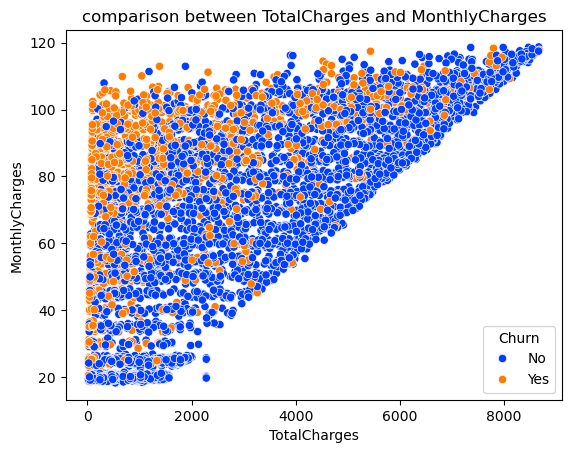

In [126]:
# Comapring TotalCharges and MonthlyCharges
plt.title("comparison between TotalCharges and MonthlyCharges")
sns.scatterplot(x = "TotalCharges", y = "MonthlyCharges", data = df, hue = "Churn", palette = "bright")

Text(0, 0.5, 'MonthlyCharges')

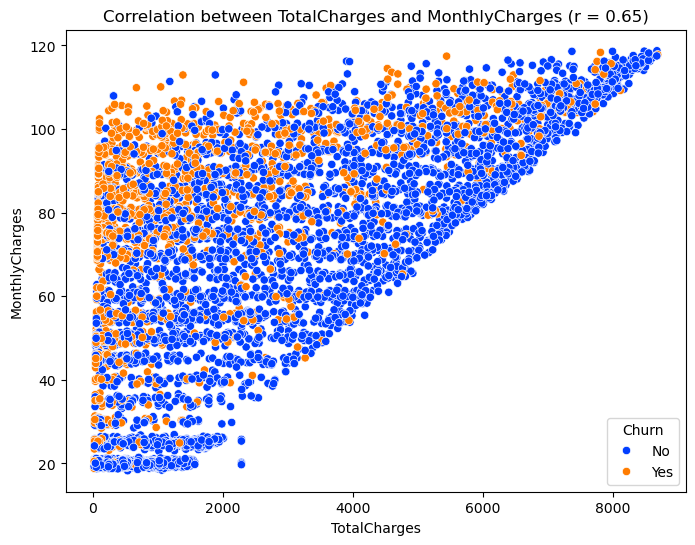

In [120]:
# Calculate Pearson correlation coefficient
correlation = df['TotalCharges'].astype(float).corr(df['MonthlyCharges'])

# Plot scatterplot with correlation
plt.figure(figsize=(8,6))
sns.scatterplot(x="TotalCharges", y="MonthlyCharges", data=df, hue="Churn", palette="bright")

# Adding the correlation coefficient to the plot
plt.title(f"Correlation between TotalCharges and MonthlyCharges (r = {correlation:.2f})")
plt.xlabel('TotalCharges')
plt.ylabel('MonthlyCharges')

There is a linear relationship between the features. Customers with higher monthly charges have a higher tendency to stop services, as they also accumulate higher total charges. Additionally, when customers are willing to pay higher monthly charges, it results in an increase in their total charges over time.

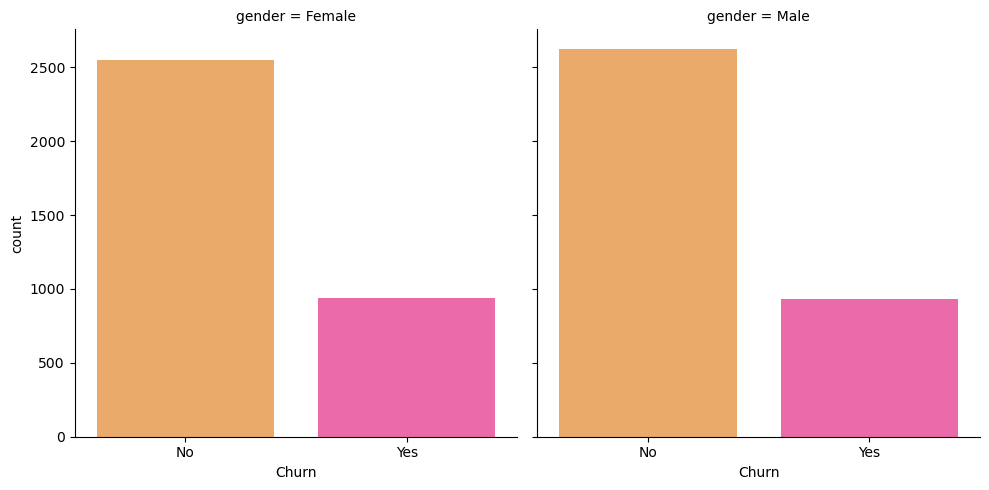

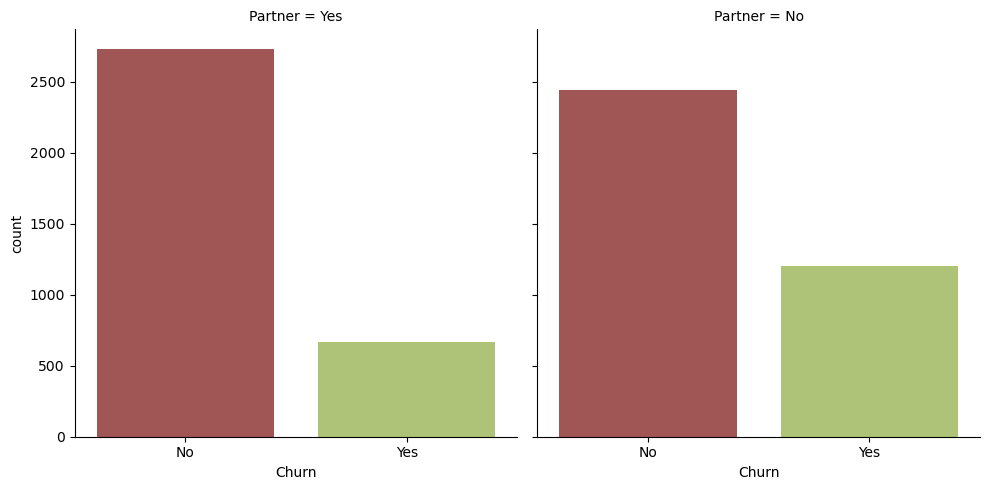

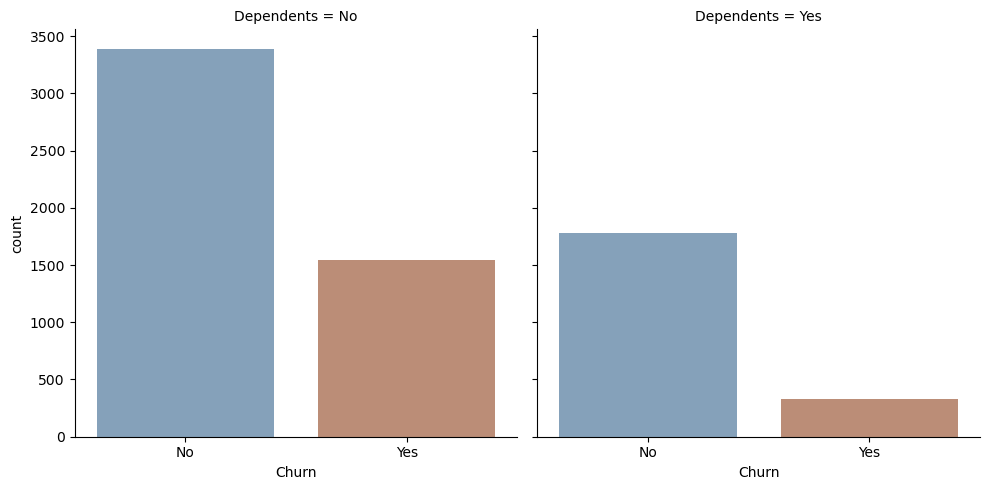

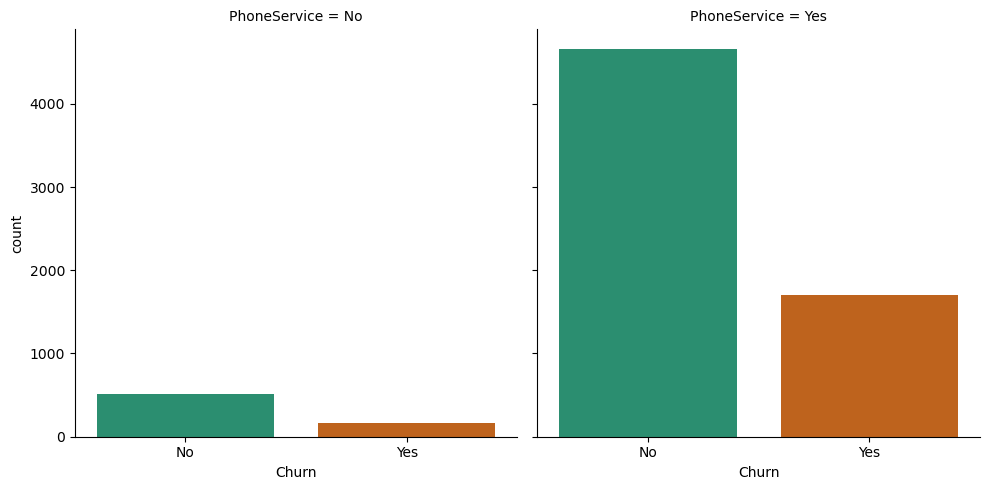

In [129]:
# Checking Churn level and gender
sns.catplot(x = 'Churn', col = 'gender', data = df, kind = "count", palette = "spring_r")

# Checking Churn level and Partner
sns.catplot(x = 'Churn', col = 'Partner', data = df, palette = 'tab20b_r', kind = "count")

# Checking Churn level in Dependents
sns.catplot(x = 'Churn', col = 'Dependents', data = df, palette = 'twilight_shifted', kind = "count")

# Checking Churn level in PhoneService
sns.catplot(x = 'Churn', col = 'PhoneService', data = df, palette = "Dark2", kind = "count")

1. **Gender**: Churn rates are similar across genders, showing no significant difference.
  
2. **Partner Status**: Customers without partners exhibit a higher churn rate than those with partners.
  
3. **Dependents**: Customers without dependents are more likely to churn than those with dependents.
  
4. **Phone Services**: Customers with phone services show a higher likelihood of churning.

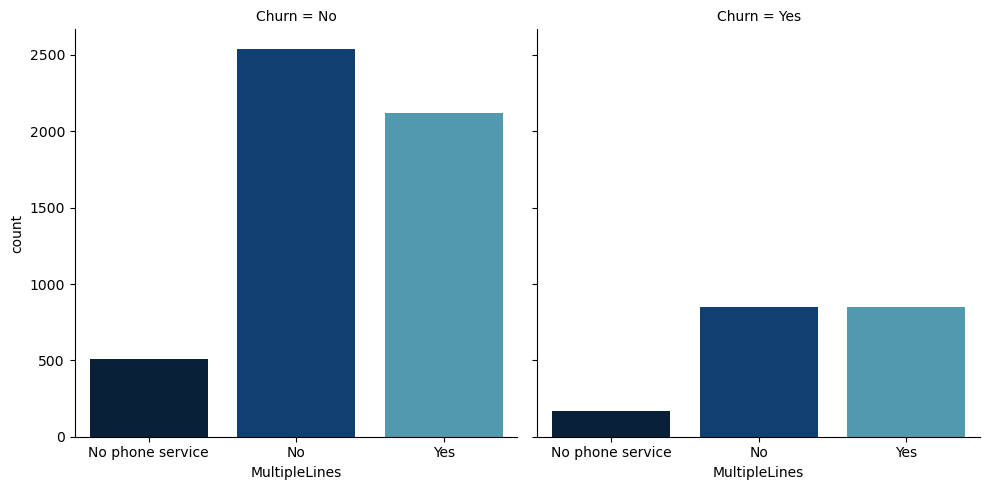

In [132]:
# Checking Churn level and MultipleLines
sns.catplot(x = 'MultipleLines', col = 'Churn', palette = "ocean", kind = "count", data = df)

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

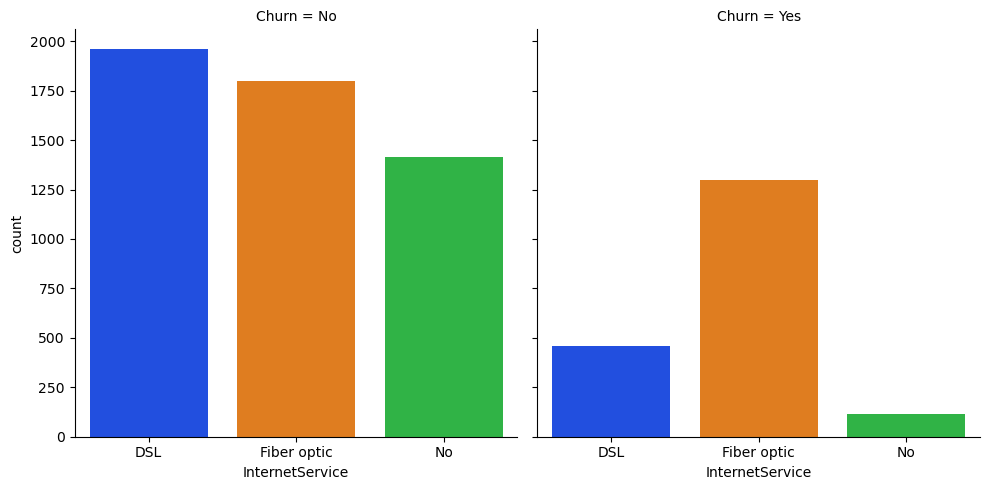

In [135]:
# Checking Churn level in InternetService
sns.catplot(x = 'InternetService', col = 'Churn', palette = "bright", kind = "count", data = df)

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

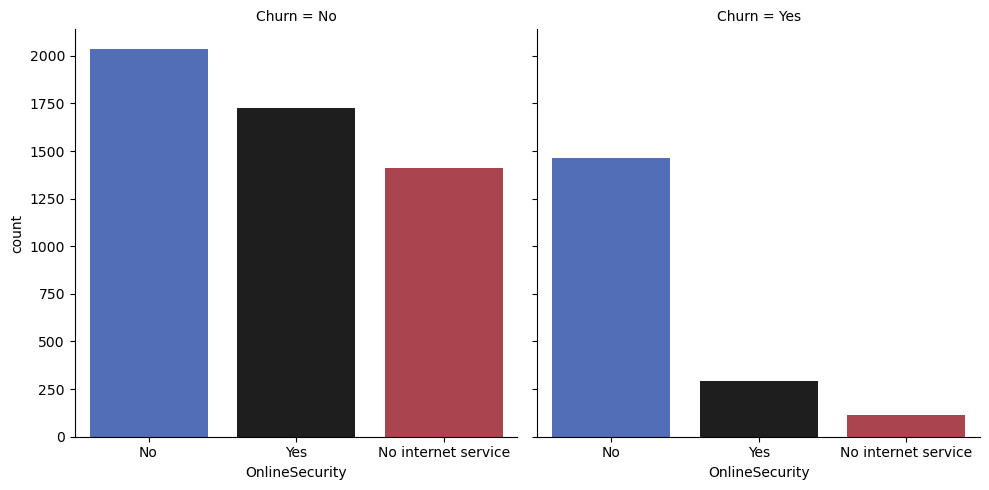

In [138]:
# Checking Churn level in OnlineSecurity
sns.catplot(x = 'OnlineSecurity', col = 'Churn', palette = "icefire", kind = "count", data = df)

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency of getting churned.

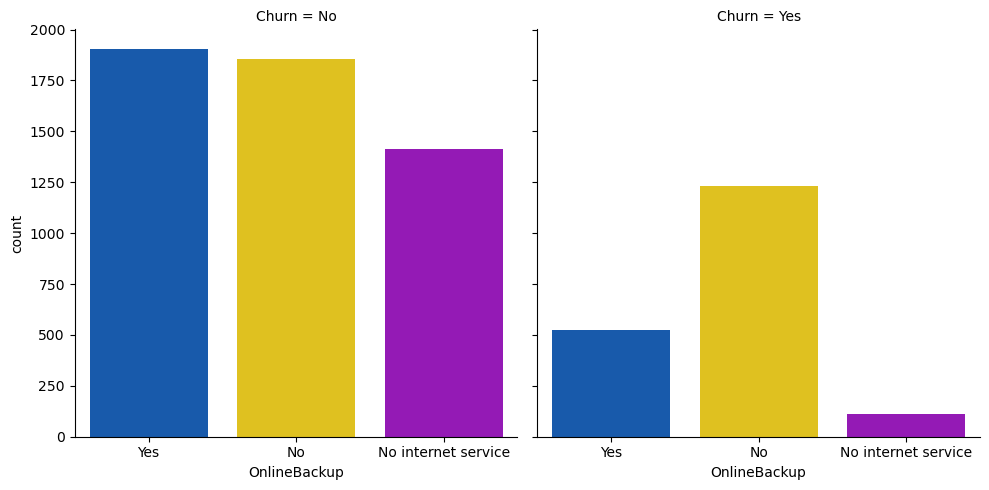

In [141]:
# Checking Churn level in OnlineBackup
sns.catplot(x = 'OnlineBackup', col = 'Churn', palette = "prism", kind = "count", data = df)

It is also same as in the case of online security. It is obvious that the customers who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

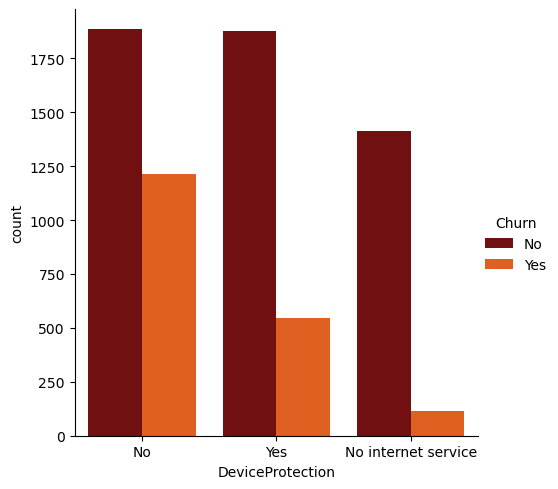

In [144]:
# Checking Churn level in DeviceProtecion
sns.catplot(x = 'DeviceProtection', hue = 'Churn', palette = "gist_heat", kind = "count", data = df)

The customers who do not own any Device protection have very high churn rate compared to others.

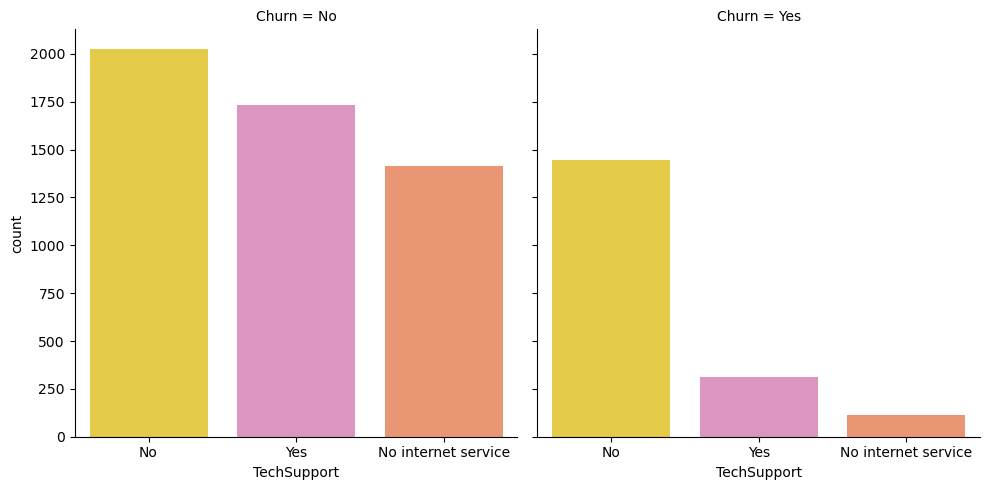

In [147]:
# Checking Churn level in TechSupport
sns.catplot(x = 'TechSupport', col = 'Churn', palette = "Set2_r", kind = "count", data = df)

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio.

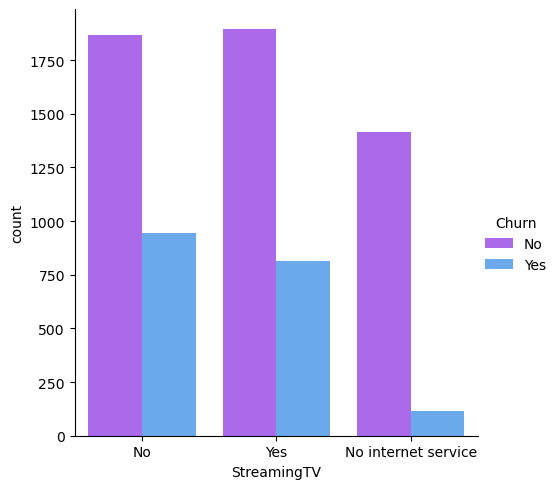

In [150]:
# Checking Churn level in StreamingTV
sns.catplot(x = 'StreamingTV', hue = 'Churn', palette = "cool_r", kind = "count", data = df)

The churn rate is nearly same if the customer owns StreamingTV or not.

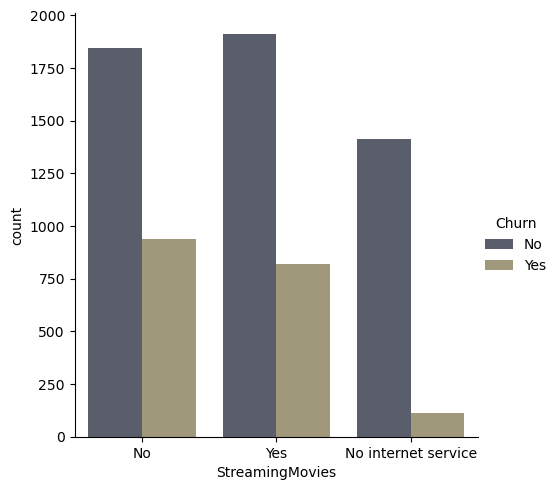

In [153]:
# Checking Churn level in StreamingMovies
sns.catplot(x = 'StreamingMovies', hue = 'Churn', palette = "cividis", kind = "count", data = df)

The customers who are existing in the company they do not own StreamingMovies in their devices, and the churn rate is low when the customer do not have internet services.

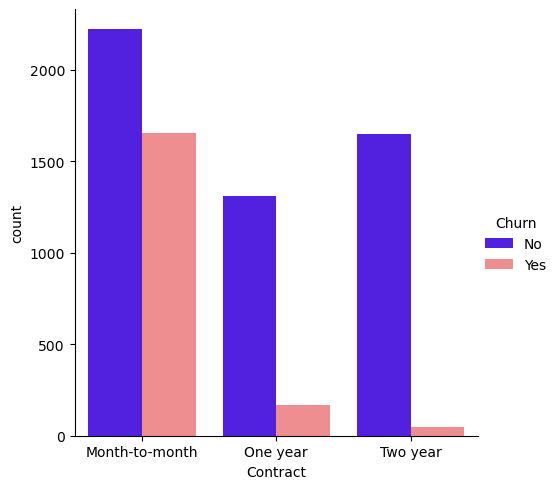

In [156]:
# Checking Churn level in Contract
sns.catplot(x = 'Contract', hue = 'Churn', palette = "gnuplot2", kind = "count", data = df)

The customers who have churned are mostly having month to month contract.

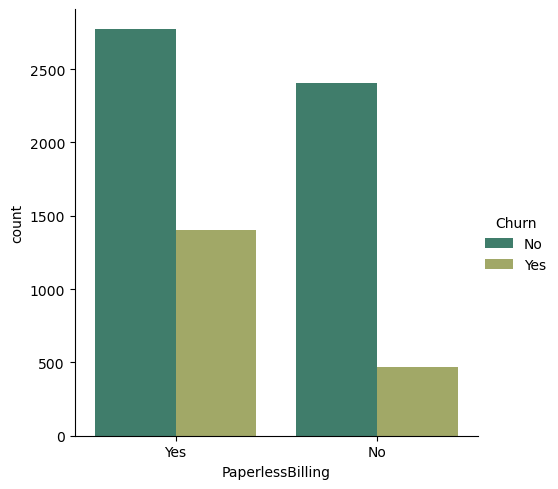

In [161]:
# Checking Churn level in PaperlessBilling
sns.catplot(x = 'PaperlessBilling', hue = 'Churn', palette = "gist_earth", kind = "count", data = df)

The customers who prefer paperless billing have high churn rate.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

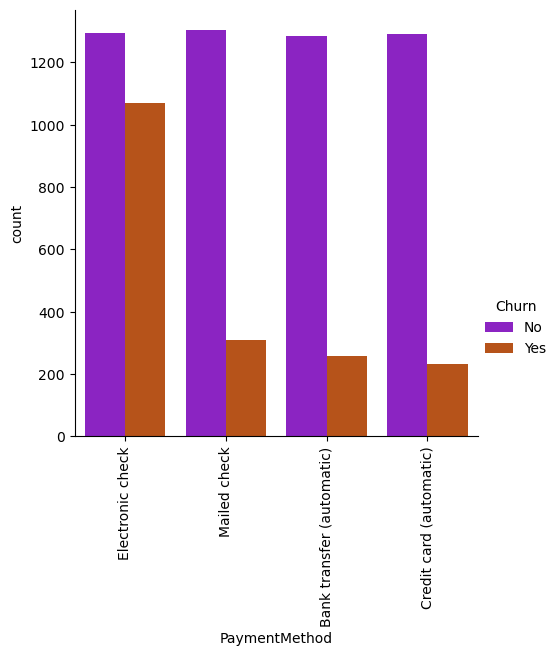

In [164]:
# Checking Churn level in PaymentMethod
sns.catplot(x = 'PaymentMethod', hue = 'Churn', palette = "gnuplot", kind = "count", data = df)
plt.xticks(rotation=90)

The customers who prefer Electronic check have high churn rate also the customers who exist in the company use equal payment method.

#### Multivariate Analysis

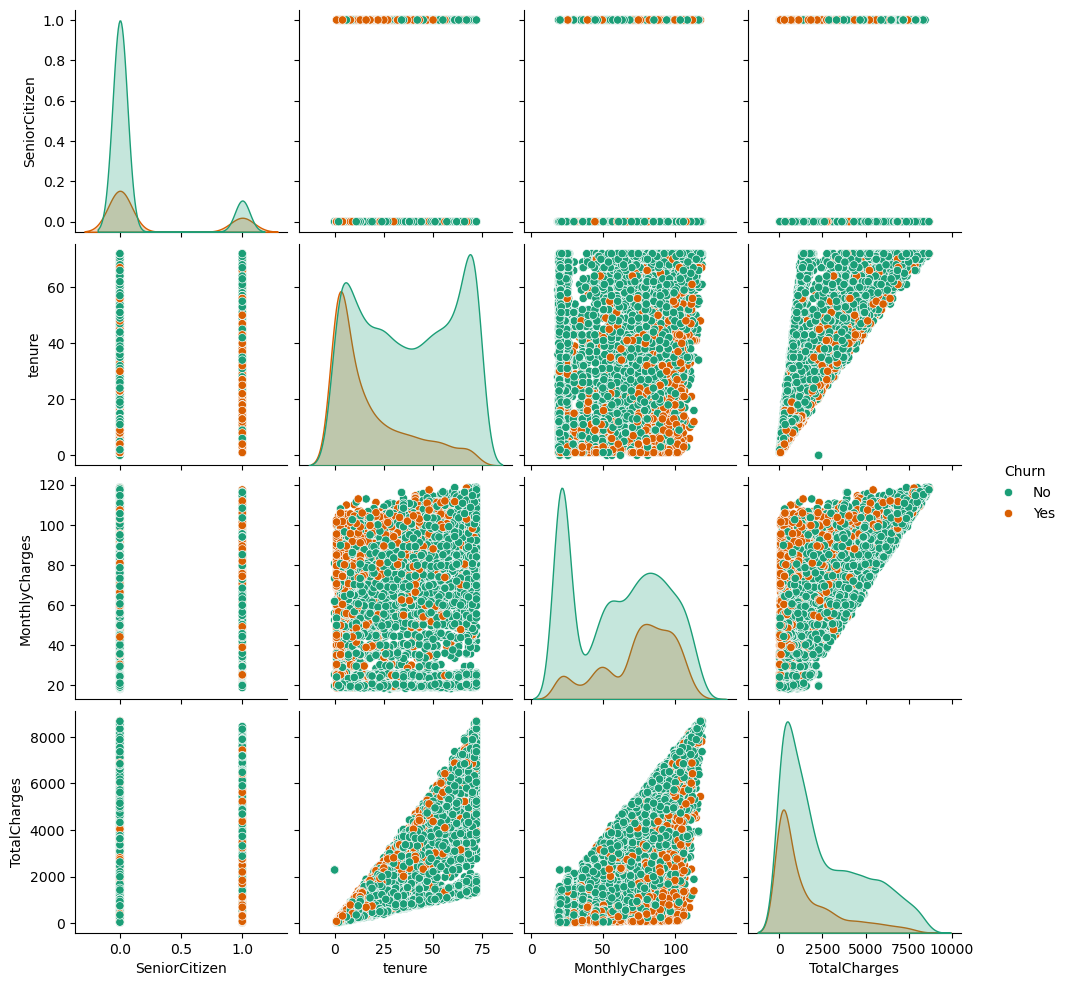

In [168]:
sns.pairplot(df, hue = "Churn", palette = "Dark2")

1. **Pairplot**: The pairplot shows pairwise relationships between features with respect to the target variable "Churn," while the diagonal displays the distribution of each feature.

2. **Feature Correlations**: There is a strong linear relationship between **tenure** and **TotalCharges**, as well as between **MonthlyCharges** and **TotalCharges**.

3. **Outliers**: No outliers are immediately visible, but box plots will be used for further investigation to identify any potential outliers.

### Checking for Outliers

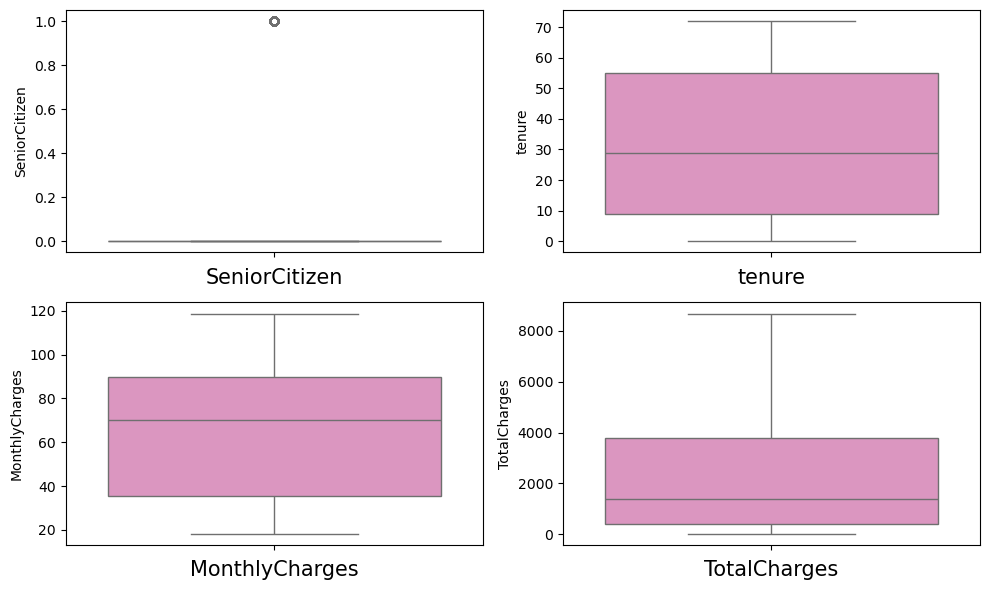

In [172]:
# Checking outliers by plotting boxplot.

plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

The Senior Citizen column has outliers; however, since it contains categorical data, there is no need to remove these outliers. Aside from this, no other columns exhibit outliers.

### Checking for skewness

In [176]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate skewness
skewness = numerical_cols.skew()
print(skewness)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64


The SeniorCitizen and TotalCharges columns exhibit skewness in the data. Since SeniorCitizen is categorical, there is no need to address its skewness. However, since TotalCharges is continuous, we will apply the cube root transformation to reduce its skewness.

#### Removing skewness

In [180]:
# Removing skewness using cuberoot method
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

Skewness removed using cube root method.

In [183]:
# Checking skewness for numeric columns only
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64


We can see the skewness has been reduced in TotalCharges column.

<Axes: xlabel='TotalCharges', ylabel='Density'>

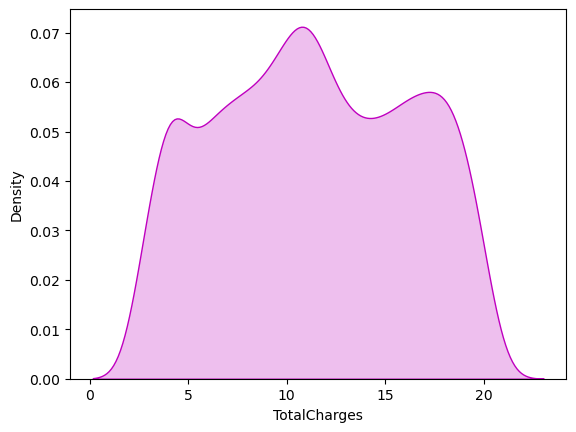

In [186]:
# Visualizing how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df['TotalCharges'], color = "m", kde_kws = {"shade":True}, hist = False)

### Encoding categorical columns

In [189]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


We have converted the categorical columns into numerical columns using Ordinal Encoding method.

In [192]:
# Statistical summary of numerical 
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical columns, we observe that all columns have consistent counts, indicating no null values in the dataset. The describe method provides a summary of each column, including the count, mean, standard deviation, minimum, interquartile range (IQR), and maximum values.

### Correlation between target variable and independent variables.

In [197]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heatmap.

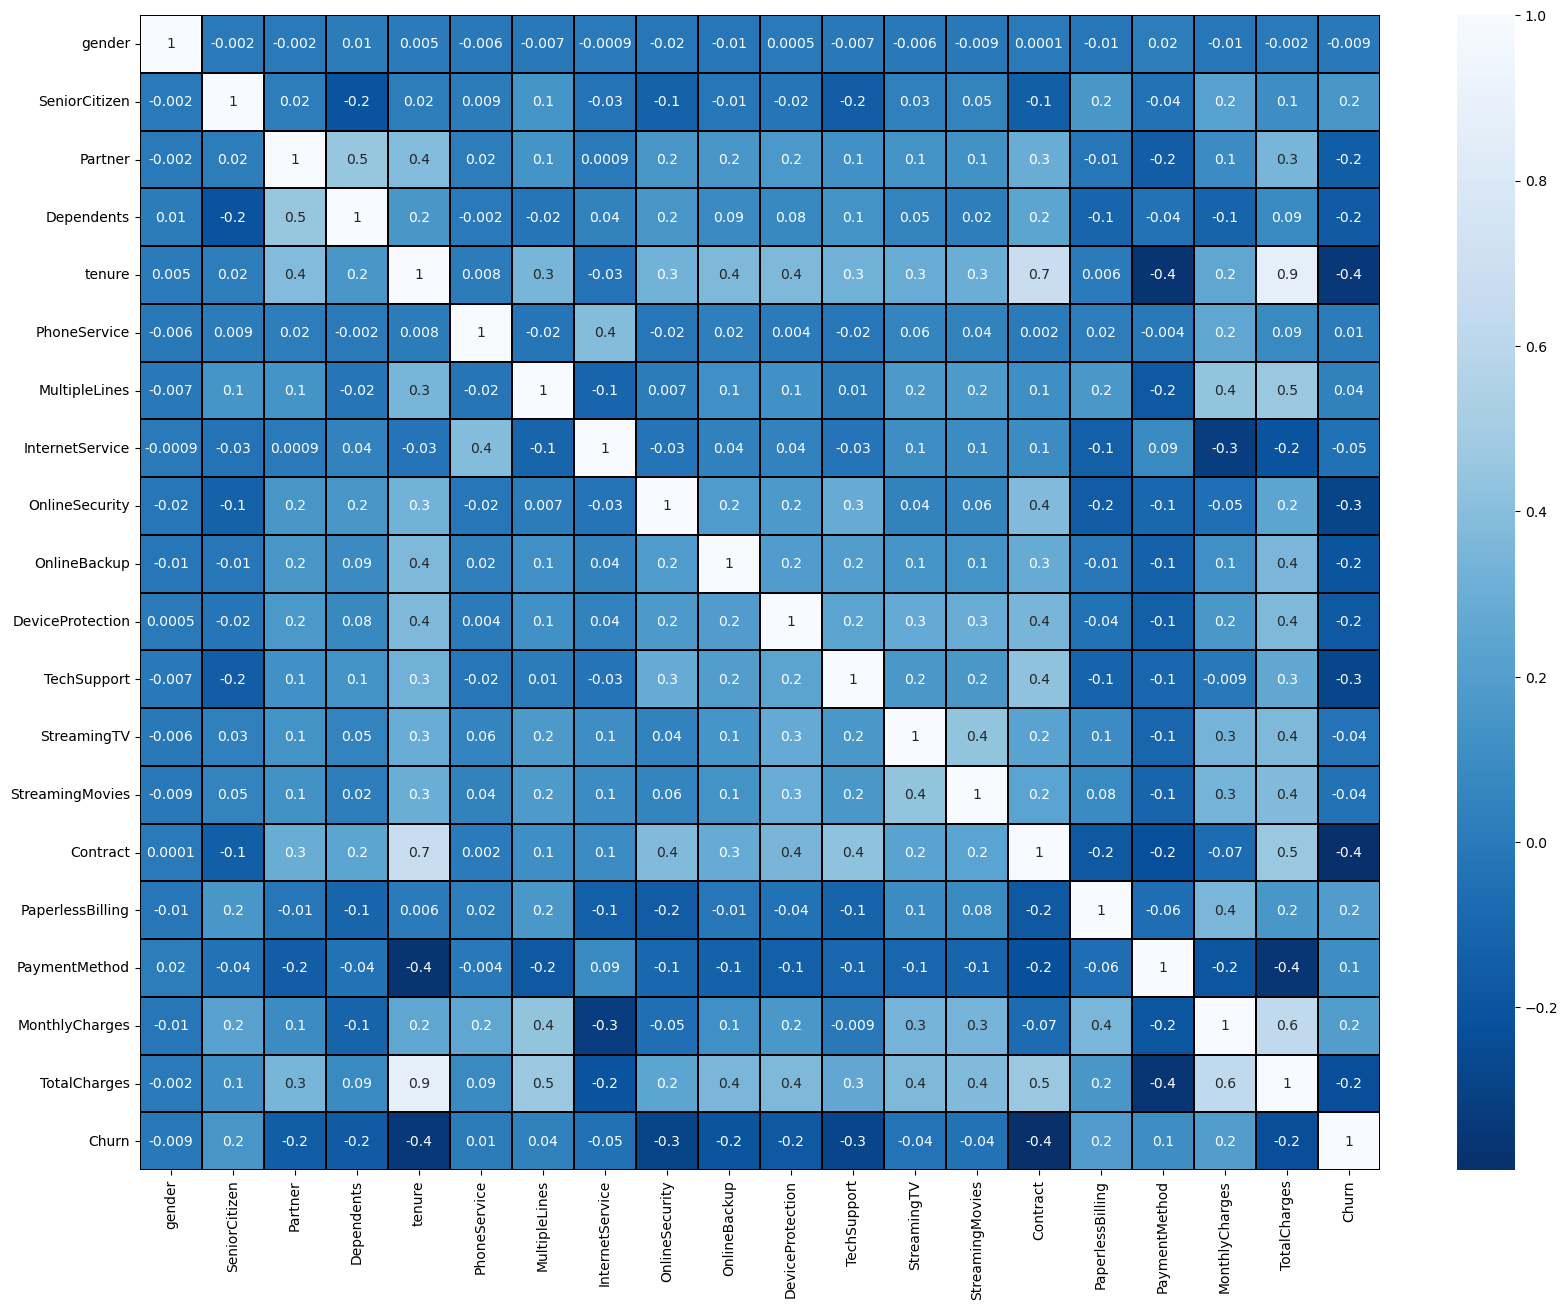

In [200]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);

This heatmap visualizes the correlation matrix, illustrating the relationships between features and the target label "Churn." It reveals both positive and negative correlations:

1. **Weak Positive Correlation**: There is minimal positive correlation between the target label and the features.

2. **Positive Correlation with Churn**: The features MonthlyCharges, PaperlessBilling, SeniorCitizen, and PaymentMethod exhibit positive correlations with the label "Churn."

3. **Negative Correlation with Churn**: The label shows negative correlations with several features, including Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner, and Dependents.

4. **Gender Correlation**: The column gender shows very weak correlation with the label, suggesting it may be dropped if necessary.

5. **High Feature Correlation**: There are strong correlations among certain features, notably between TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges, among others.

In [203]:
cor['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive and negative correlated features with the target.

### Visualizing the correlation between label and features using bar plot

Text(0.5, 1.0, 'Correlation between label and features using barplot')

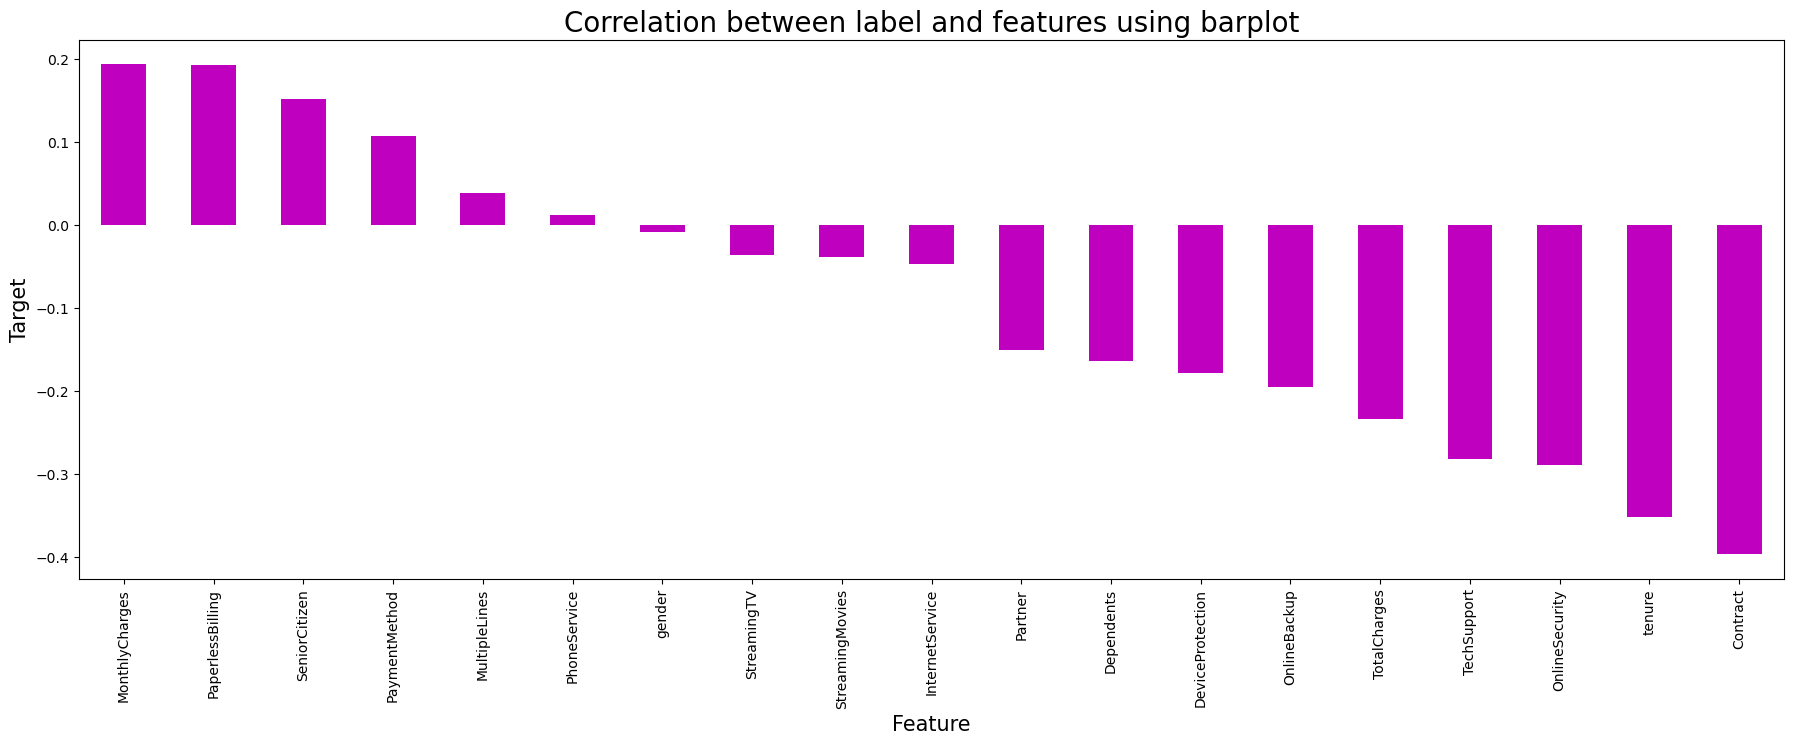

In [207]:
plt.figure(figsize = (22, 7))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

### Separating features and label

In [211]:
x = df.drop("Churn", axis = 1)
y = df["Churn"]

#### Feature Scaling using Standard Scalarization

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


Scaled the data using Standard Scalarization method to overcome the issue of biasness.

### Checking Variance Inflation Factor(VIF)

In [219]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking the VIF (Variance Inflation Factor) values, we can identify features contributing to multicollinearity. Here, both TotalCharges and tenure have VIF values greater than 10, indicating high correlation with other features. We'll start by dropping one of these columns, and if multicollinearity persists, we will continue removing the feature with the highest VIF.

In [222]:
# Dropping TotalCharges column
x.drop("TotalCharges", axis = 1, inplace = True)

In [224]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


Multicolinearity issue is resolved. Next step will be model building.

In [227]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

### Oversampling

In [231]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x, y)

In [233]:
# Checking value count of target column
y.value_counts()

Churn
0.0    5174
1.0    5174
Name: count, dtype: int64

Now the data is balanced. Now we can build machine learning classification models.

# Modelling

### Finding the best random state

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
for i in range(1, 20):  # Start with a smaller range
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier(n_estimators=10, n_jobs=-1, verbose=0)  # Set verbose to 0 to suppress output
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is ", maxAccu, "at random_state", maxRS)

Best accuracy is  0.8466988727858293 at random_state 12


The best accuracy is 84.66% at random_state 12.

### Creating train test split

In [247]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

## Classification Algorithms

In [250]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

#### RandomForestClassifier

In [253]:
# Checking accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8579710144927536
[[1335  225]
 [ 216 1329]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1560
         1.0       0.86      0.86      0.86      1545

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy for this model is 86%.

Text(0.5, 1.0, 'Confusion Matrix for RandomForestClassifier')

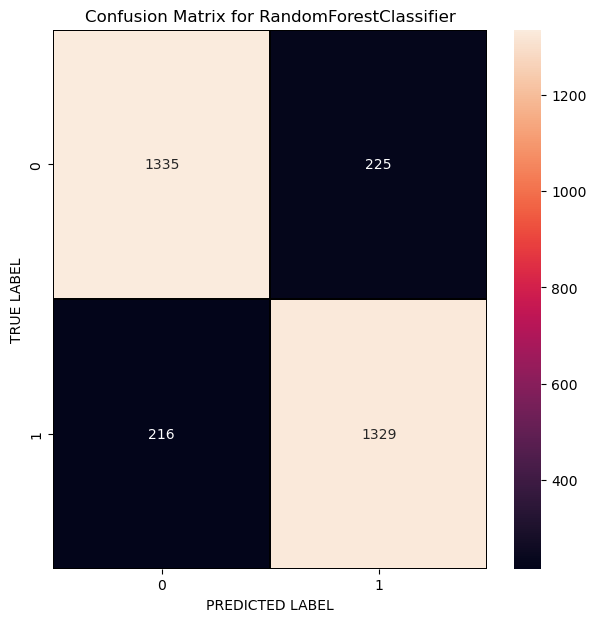

In [256]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test, predRFC)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')

#### Logistic Regression

In [259]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7642512077294686
[[1173  387]
 [ 345 1200]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      1560
         1.0       0.76      0.78      0.77      1545

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



The accuracy score using LogisticRegression is 76%.

Text(0.5, 1.0, 'Confusion Matrix for LogisticRegression')

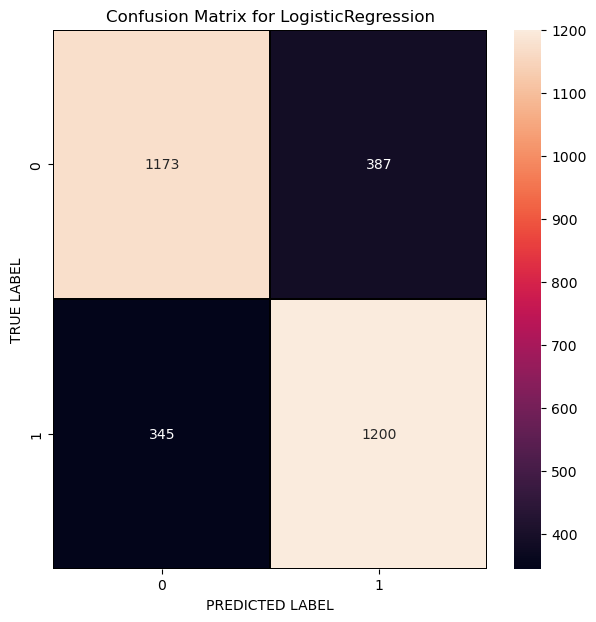

In [262]:
# Plotting confusion matrix for LogisticRegression
cm = confusion_matrix(y_test, predLR)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')

#### Support Vector Machine Classifier

In [265]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8061191626409018
[[1229  331]
 [ 271 1274]]
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      1560
         1.0       0.79      0.82      0.81      1545

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



The accuracy score using Support Vector Machine Classifier is 81%.

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine Classifier')

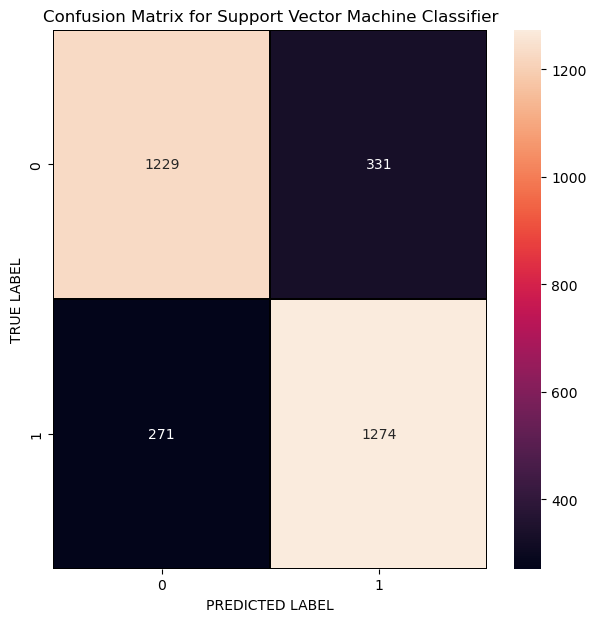

In [268]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test, predsvc)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')

#### Gradient Boosting Classifier

In [271]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8499194847020934
[[1294  266]
 [ 200 1345]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1560
         1.0       0.83      0.87      0.85      1545

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



The accuracy_score using Gradient Boosting Classifier is 85%

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

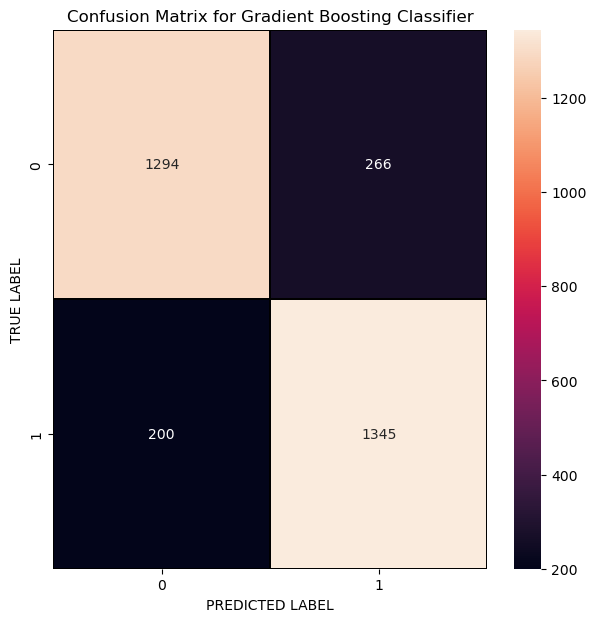

In [274]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test, predGB)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

#### AdaBoost Classifier

In [277]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8135265700483092
[[1229  331]
 [ 248 1297]]
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1560
         1.0       0.80      0.84      0.82      1545

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



The accuracy_score using AdaBoostClassifier is 81%.



Text(0.5, 1.0, 'Confusion Matrix for AdaBoostClassifier')

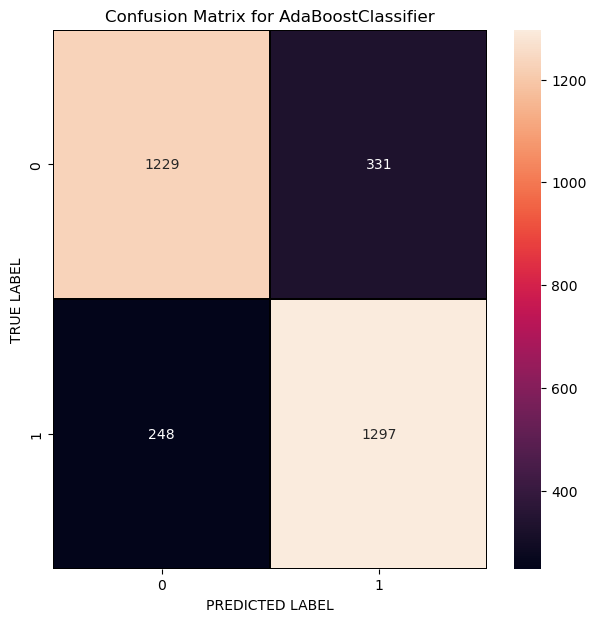

In [280]:
# Lets plot confusion matrix for AdaBoostClassifier
cm = confusion_matrix(y_test, predABC)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')

#### BaggingClassifier

In [283]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8302737520128824
[[1344  216]
 [ 311 1234]]
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      1560
         1.0       0.85      0.80      0.82      1545

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy_score using BaggingClassifier is 83%

Text(0.5, 1.0, 'Confusion Matrix for BaggingClassifier')

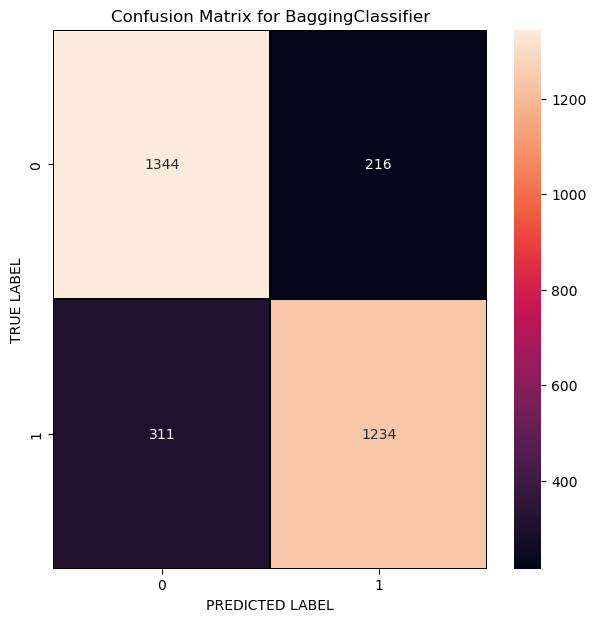

In [286]:
# Lets plot confusion matrix for BaggingClassifier
cm = confusion_matrix(y_test, predBC)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')

#### ExtraTreesClassifier

In [289]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8615136876006442
[[1330  230]
 [ 200 1345]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1560
         1.0       0.85      0.87      0.86      1545

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy_score using ExtraTreesClassifier is 86%.

Text(0.5, 1.0, 'Confusion Matrix for ExtraTreesClassifier')

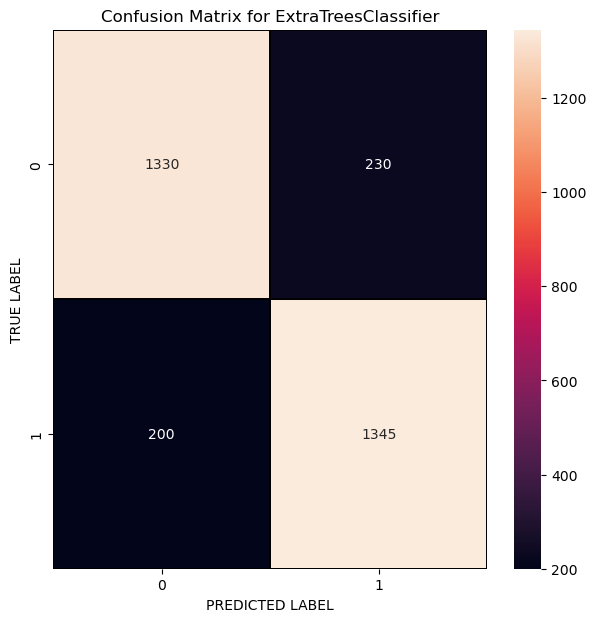

In [292]:
# Lets plot confusion matrix for ExtraTreesClassifier
cm = confusion_matrix(y_test, predET)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')

### Cross Validation Score

In [295]:
from sklearn.model_selection import cross_val_score

In [297]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predRFC) - score.mean())

[0.7705314  0.78888889 0.89130435 0.89656839 0.90575157]
0.8506089198030274
Difference between Accuracy score and cross validation score is -  0.007362094689726151


In [299]:
# Checking cv score for Logistic Regression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predLR) - score.mean())

[0.77342995 0.75652174 0.77246377 0.78492025 0.7781537 ]
0.7730978815409438
Difference between Accuracy score and cross validation score is -  -0.008846673811475192


In [302]:
# Checking cv score for Gradient Boosting Classifier
score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test, predGB) - score.mean())

[0.7531401  0.78164251 0.8705314  0.88400193 0.88400193]
0.8346635752528118
Difference between Accuracy score and cross validation score is -  0.01525590944928168


In [304]:
# Checking cv score for Support Vector Machine Classifier
score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test, predsvc) - score.mean())

[0.7763285  0.77584541 0.80966184 0.82261962 0.83035283]
0.8029616398502858
Difference between Accuracy score and cross validation score is -  0.0031575227906159853


In [306]:
# Checking cv score for AdaBoosting Classifier
score = cross_val_score(ABC, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test, predABC) - score.mean())

[0.76521739 0.77294686 0.82801932 0.83905268 0.83953601]
0.8089544530135446
Difference between Accuracy score and cross validation score is -  0.004572117034764567


In [308]:
# Checking cv score for Bagging Classifier
score = cross_val_score(BC, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test, predBC) - score.mean())

[0.73429952 0.75748792 0.8705314  0.88013533 0.89270179]
0.8270311919922108
Difference between Accuracy score and cross validation score is -  0.003242560020671692


In [310]:
# Checking cv score for Extra Trees Classifier
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test, predET) - score.mean())

[0.80434783 0.80289855 0.89613527 0.9062349  0.9101015 ]
0.8639436073811009
Difference between Accuracy score and cross validation score is -  -0.002429919780456702


Extra Trees Classifier is our best model as the difference between accuracy score and cross validation score is least. 

#### Extra Trees Classifier is our best Model 

### Hyper Parameter Tuning

In [314]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50, 100, 200, 300]}

In [316]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [318]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [320]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [322]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 200, n_jobs = -2, random_state = 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

86.73107890499196


Text(0.5, 1.0, 'Confusion Matrix for  Final Model')

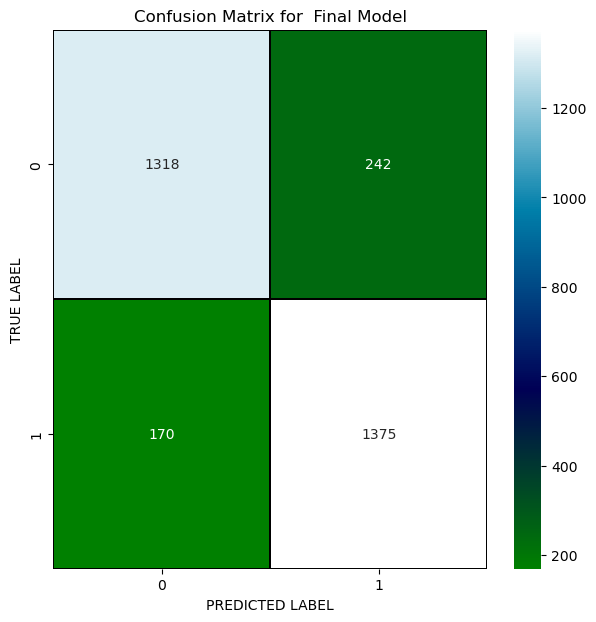

In [324]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean", xticklabels = x_axis_labels, yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')

### Plotting ROC and compare AUC for all the models used


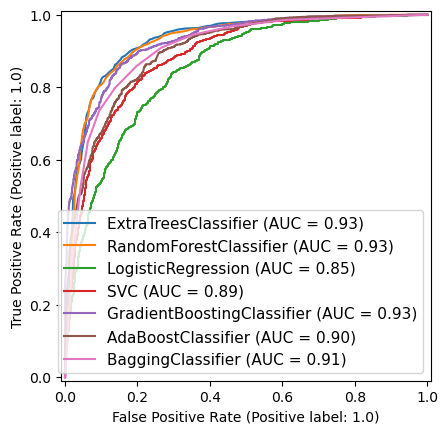

In [329]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming ET, RFC, LR, svc, GB, ABC, BC are all defined models
# Replace plot_roc_curve with RocCurveDisplay

# Create ROC plot for the first model
disp = RocCurveDisplay.from_estimator(ET, x_test, y_test)  # or .from_predictions

# Add ROC curves for other models to the same plot
RocCurveDisplay.from_estimator(RFC, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(LR, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(GB, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(ABC, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(BC, x_test, y_test, ax=disp.ax_)

# Adjust legend and plot
plt.legend(prop={'size':11}, loc='lower right')

Here we can see area under curve for each model used.

#### Plotting ROC and compare AUC for the best model

Text(0.5, 1.0, 'ROC for the best model')

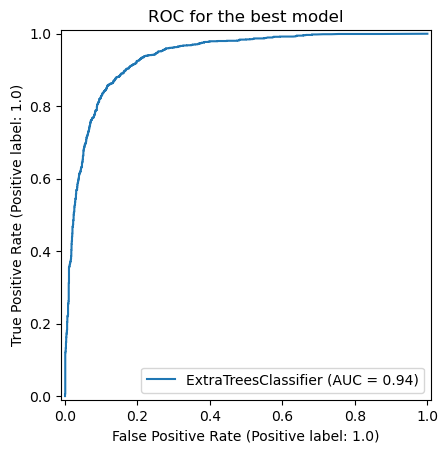

In [335]:
# Assuming 'Final_model' is the best model after hyperparameter tuning
RocCurveDisplay.from_estimator(Final_model, x_test, y_test)
plt.title("ROC for the best model")

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%.

### Saving the model

In [339]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

#### Predicting the saved model

In [342]:
# Lets load the saved model and get the predictions
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 1., ..., 1., 0., 1.])

These are the predicted churned values of the customers.

In [345]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3100,0.0,0.0
3101,0.0,0.0
3102,1.0,1.0
3103,0.0,0.0
